# Проект по анализу данных

# Название: New Shows and Movies

# Данные компании: Netflix

[Данные с сайта stratascratch](https://platform.stratascratch.com/data-projects/new-shows-and-movies)

<hr style="border: 2px solid green;" />

**Цель:**
- Проанализировать данные и выявить инсайты, которые помогут Netflix определить, какие фильмы\сериалы производить и как  развивать бизнес в разных странах.

**Структура проекта:**
1. Предобработка данных
2. Исследовательский анализ данных (EDA)

**Задачи:**
- Изучить, как менялось количество фильмов и сериалов, выпущенных с 2000 года
- Сравнить данных о фильмах и сериалах
- Определить, когда лучшее время для запуска сериала
- Проанализировать продолжительность сериалов
- Проанализировать продолжительность  фильмов
- Провести анализ стран-производителей фильмов\сериалов, представленных на Netflix

**Описание данных:**

Файл netflix_data.csv содержит данные о сериалах и фильмах компании Netflix.

- show_id - уникальный идентификатор фильма/сериала
- type - тип: фильм/сериал
- title - название
- director - режиссёр
- cast - актерский состав
- country - страна
- date_added - дата добавления на Netflix
- release_year - год выпуска фильма\сериала
- rating - телевизионный рейтинг
- duration - длительность фильма\количество сезонов в сериале
- listed_in - жанр
- description - описание

<hr style="border: 2px solid green;" />

**Итоги исследования:**

**Общее:**

- Начиная с 1925 года количество релизов постепенно возрастало и достигло пика в 2018 году. Затем начался небольшой спад;
- Значительное увеличение релизов фильмов и сериалов начинается с 2015 года. В 2021 наметился спад, вероятно, по причине пандемии в 2020.
- Большая часть фильмов и сериалов на Netflix производства США - 39%. Далее следуют: Индия(12%), Великобритания(8%), Канада(3.6%), Япония(3.4%);
- Большая часть фильмов и сериалов на Netflix имеют рейтинг TV-MA (контент для зрелой аудитории) 37.9%. Далее следует TV-14 (24.5%), т.е. подходит для детей младше 14 лет;
- Интересно, что доля сериалов в рейтингах TV-Y и TV-Y7 превышает долю фильмов.

**Сериалы:**

- Доля выпущенных сериалов с 2000 года - 32%;
- Подавляющее число релизов происходит **в пятницу (35.2%)**. На втором месте (но с большим отрывом) - **среда (14.2%)**;
- Обычно **сериалы стартуют в декабре (10%)**, июле (9.8%) и сентябре (9.4%);
- Подавляющее большинство сериалов (67.2%) имеют **всего один сезон**;
- Самый длительное сериал - Grey's Anatomy (Анатомия страсти) - состоит из 17 сезонов.
- В 2021 количество релизов сериалов превысило количество фильмов. Свою роль сыграла пандемия, кинотеатры закрыты, сильно возрос интерес к стриминговым сервисам по подписке такой тренд сохраняется и сейчас;

**Фильмы:**

- Доля выпущенных фильмов с 2000 года - 68%;
- Средняя продолжительность фильма - **98 минут**;
- Самое продолжительный фильм - Black Mirror: Bandersnatch - длится 312 минуты
- Пик релизов фильмов приходится на 2017-2018 года. Начиная с 2019 количество выпущенных фильмов начало сокращаться (в т.ч. по причине пандемии);

<hr style="border: 2px solid green;" />

In [450]:
# Импорт библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats as st
import requests
import re
import warnings
warnings.filterwarnings("ignore")

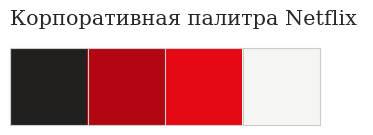

In [451]:
# Палитры для графиков (категориальная)

sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])
palette = ['#221f1f', '#b20710', '#e50914','#f5f5f1']

plt.title("Корпоративная палитра Netflix ", loc='left', fontfamily='serif', fontsize=15, y=1.2)
plt.show()

# Непрерывная шкала - 'Reds'
# Diverging (расходящиеся) палитра - seismic

In [452]:
df = pd.read_csv(r"C:\Users\mirra\Desktop\Yandex.praktikum\Stratascratch\New Shows and Movies (DS)\datasets\netflix_data.csv")

In [453]:
# Выведем данные с общей информацией о датасете

tables = {'df':df}

for name, table in tables.items():
    print(
        f'\n\033[1;30;46m_____________ДАТАСЕТ:  {name.upper()}_____________\033[0;0m\n',
        '\n\033[2;30;47m Вывод первых строк: \033[0;0m',
        )
    display(table.head(3))
    print('\n\033[2;30;47m Общая информация: \033[0;0m')
    display(table.info(memory_usage='deep'))
    print('\033[2;30;47m Подсчет доли пропусков в %: \033[0;0m')
    display(round(table.isnull().mean() * 100, 2))
    print(
        '\033[2;30;47m Подсчет дубликатов\033[0;0m', 
        '  ', round(table.duplicated().mean() * 100, 4),  ' %'
        )
    print('\n\033[2;30;47m Общая сводка строковых значений: \033[0;0m')
    try:
        display(table.describe(include=['object']).T)
    except:
        print('Датасет не содержит строковых значений')
    print('\n\033[2;30;47m Сводка числовых значений, включая даты: \033[0;0m')
    try:
        display(table.describe(datetime_is_numeric=True).T)
    except:
        print('Датасет не содержит числовых значений')
    print ('\n\033[01;30;46m_____________ОКОНЧАНИЕ ОТЧЕТА ПО ДАТАСЕТУ_____________\033[0;0m\n\n')


_____________ДАТАСЕТ:  DF_____________
 
 Вывод первых строк: 


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...



 Общая информация: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 8.5 MB


None

 Подсчет доли пропусков в %: 


show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64

 Подсчет дубликатов    0.0  %

 Общая сводка строковых значений: 


,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362



 Сводка числовых значений, включая даты: 


,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0



_____________ОКОНЧАНИЕ ОТЧЕТА ПО ДАТАСЕТУ_____________




**Выводы по датасету:**

- Полные дубликаты отсутствуют;
- Есть пропуски. Большая часть в колонках `director` (29.91%), `cast` (9.37%) и `country` (9.44%). 
- Так как пропусков в ключевой колонке с названием фильма\сериала `title` нет, строки с пропущенными значениями удалять не будем, а пропуски в колонках director, cast и country заполним заглушкой 'No Data';
- Колонка с датой добавления на Netflix (`date_added`) имеет тип object. Применим к колонке метод `pd.to_datetime`; 
- Колонка `duration` содержит данные о длительности фильма и сериала в формате object. Ее преобразуем так - сделаем два среда (один для фильмов, другой для сериалов), затем в срезе по фильмам `duration` преобразуем в int и посмотрим распределение. А в срезе по сериалам оставим object, затем сгруппируем и посмотрим, какое количество сезонов бывает. 

<hr style="border: 2px solid green;" />

## 1. Предобработка данных

In [454]:
# Заполнение пропусков заглушкой
df['director'].replace(np.nan, 'No Data', inplace  = True)
df['cast'].replace(np.nan, 'No Data', inplace  = True)
df['country'].replace(np.nan, 'No Data', inplace  = True)

In [455]:
# Присутствуют некорректные значения в колонке rating - '74 min', '84 min', '66 min'
display(df['rating'].unique())

df['rating'].replace('74 min', 'No Data', inplace  = True)
df['rating'].replace('84 min', 'No Data', inplace  = True)
df['rating'].replace('66 min', 'No Data', inplace  = True)
df['rating'].replace(np.nan, 'No Data', inplace  = True)

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [456]:
# Добавим новую колонку date с типом данных datetime64
df['date'] = pd.to_datetime(df['date_added'])

In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   object        
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  date          8797 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 894.6+ KB


### Выводы:

- Пропусти в колонках `director`, `cast`, `country`, а также некорректные значения в `rating` заполнены заглушкой;
- Создана колонка  `date` с типом данных `datetime64`. Далее выделим из нее день недели и месяц релиза фильма на Netflix.

<hr style="border: 2px solid green;" />

## 2. Исследовательский анализ данных (EDA)

### Изменение количества фильмов и сериалов, выпущенных с 2000 года

In [458]:
# Срез - датасет с фильмами и сериалами, выпущенными с 2000 года
df_2 = df[df['release_year'] >= 2000]

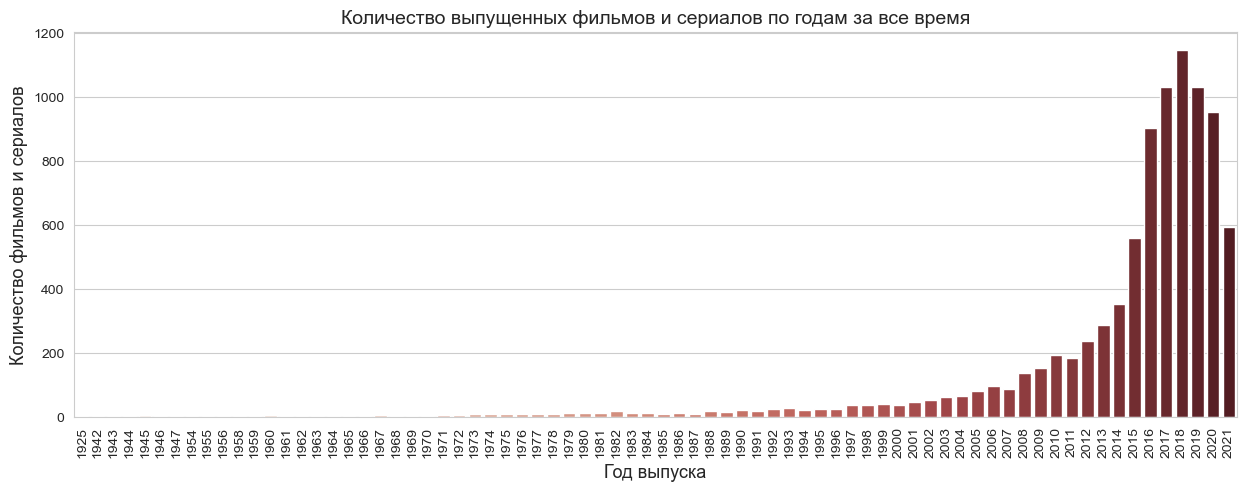

In [459]:
    plt.figure(figsize=(15, 5))
    plt.grid(True)
    sns.barplot(x='release_year', y='show_id', 
                data=df.groupby('release_year')['show_id'].count()
                .to_frame()
                .reset_index()
                .sort_values(by='release_year', ascending=False), 
                palette='Reds', 
                saturation=.5)
    sns.set_style("whitegrid")
    plt.title('Количество выпущенных фильмов и сериалов по годам за все время', size=14)
    plt.xlabel('Год выпуска', size=13)
    plt.ylabel('Количество фильмов и сериалов', size=13)
    plt.xticks(rotation=90)
    plt.show()

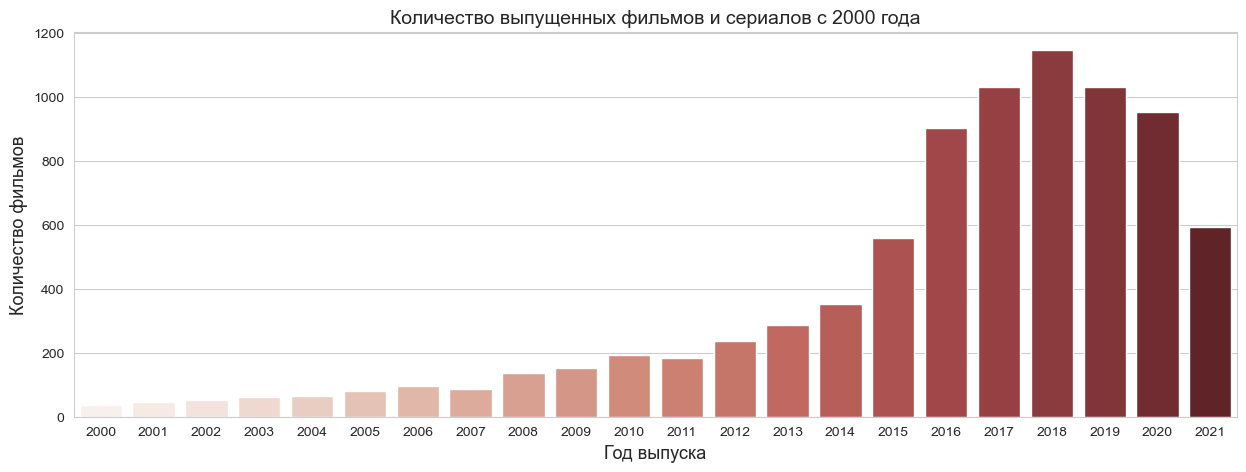

In [460]:
    plt.figure(figsize=(15, 5))
    plt.grid(True)
    sns.barplot(x='release_year', y='show_id', 
                data=df_2.groupby('release_year')['show_id'].count()
                .to_frame()
                .reset_index()
                .sort_values(by='release_year', ascending=False), 
                palette='Reds', 
                saturation=.5)
    sns.set_style("whitegrid")
    plt.title('Количество выпущенных фильмов и сериалов с 2000 года', size=14)
    plt.xlabel('Год выпуска', size=13)
    plt.ylabel('Количество фильмов', size=13)
    plt.show()

### Выводы:

- Начиная с 1925 количество релизов постепенно возрастало и достигло пика в 2018 году. Затем начался небольшой спад;
- Значительное увеличение релизов начинается с 2015 года;
- В 2021 виден резкий спад, вероятно, по причине пандемии в 2020. 


<hr style="border: 2px solid green;" />

### Сравнение данных о фильмах и сериалах

In [461]:
# Доля фильмов и сериалов за все время
df['type'].value_counts(normalize=True)

Movie      0.696151
TV Show    0.303849
Name: type, dtype: float64

In [462]:
# Доля фильмов и сериалов с 2000 года
df_2['type'].value_counts(normalize=True)

Movie      0.682806
TV Show    0.317194
Name: type, dtype: float64

In [463]:
type_count = df_2.groupby(['release_year', 'type'])['show_id'].count().to_frame().rename(columns={'show_id':'count'}).reset_index()
type_count['share'] = ((type_count[type_count['type'] == 'Movie']['count'] / 
                        type_count[type_count['type'] == 'Movie']['count'].sum()) *100).round(3)
type_count['share_2'] = ((type_count[type_count['type'] == 'TV Show']['count'] /
                          type_count[type_count['type'] == 'TV Show']['count'].sum()) *100).round(3)

#type_count

In [464]:
print('Количество выпущенных фильмов за период:', type_count[type_count['type'] == 'Movie']['count'].sum(), 
      ', доля фильмов:', df_2['type'].value_counts(normalize=True)[0].round(2))
print('Количество выпущенных шоу за период:', type_count[type_count['type'] == 'TV Show']['count'].sum(), 
      ', доля шоу:', df_2['type'].value_counts(normalize=True)[1].round(2))

Количество выпущенных фильмов за период: 5655 , доля фильмов: 0.68
Количество выпущенных шоу за период: 2627 , доля шоу: 0.32


In [465]:
type_count['count'].sum()

8282

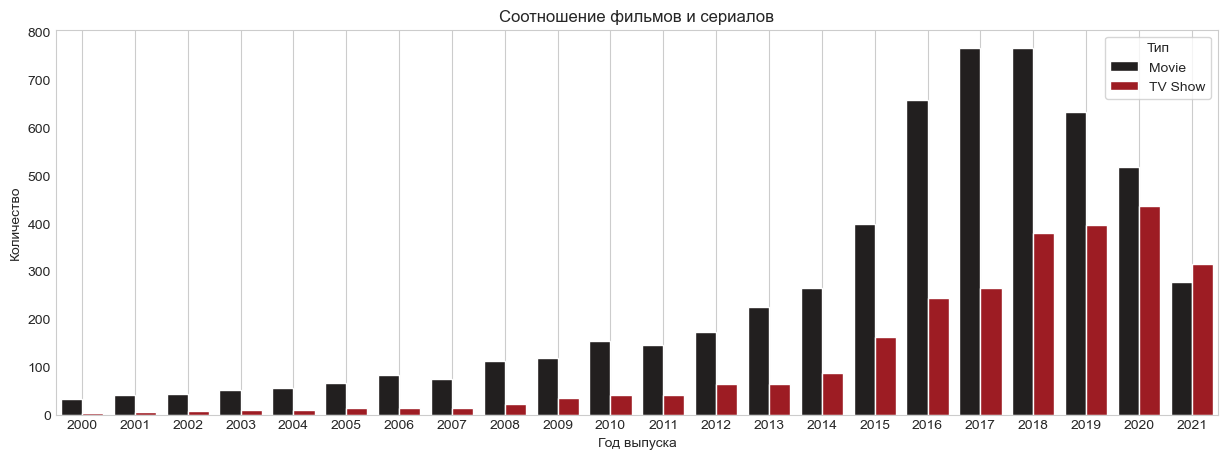

In [466]:
plt.figure(figsize = (15,5))

ax = sns.barplot(y='count', x= 'release_year', data=type_count, hue = 'type', palette=palette)
plt.title('Соотношение фильмов и сериалов')
plt.xlabel('Год выпуска')
plt.ylabel('Количество')
plt.legend(title='Тип', loc='upper right')
plt.grid()
ax.tick_params(direction="in", length=10)
ax.set_axisbelow(True);

### Выводы:

- Доля выпущенных фильмов с 2000 года - 68%;
- Доля выпущенных сериалов с 2000 года - 32%;
- Пик релизов фильмов приходится на 2017-2018 года;
- Начиная с 2019 количество фильмов начало сокращаться (в т.ч. по причине пандемии)
- В 2021 количество релизов сериалов превысило количество фильмов. Свою роль сыграла пандемия, кинотеатры закрыты, сильно возрос интерес к стриминговым сервисам по подписке такой тренд сохраняется и сейчас. 


<hr style="border: 2px solid green;" />

### Когда лучшее время для запуска сериала?

In [467]:
# Добавим новые колонки 
df_2['year_month'] = df_2['date'].dt.to_period("M")
df_2['weekday'] = df_2['date'].dt.day_name()
df_2['month_name'] = df_2['date'].dt.month_name()

In [468]:
# Создаем срез по сериалам
show = df_2[df_2['type'] == 'TV Show']

show_weekday = show.groupby('weekday')['show_id'].count().to_frame().reset_index()

# Доля 
show_weekday['share'] = (show_weekday['show_id'] / show_weekday['show_id'].sum()).round(3) *100
show_weekday

,weekday,show_id,share
0,Friday,920,35.2
1,Monday,220,8.4
2,Saturday,252,9.6
3,Sunday,177,6.8
4,Thursday,338,12.9
5,Tuesday,338,12.9
6,Wednesday,372,14.2


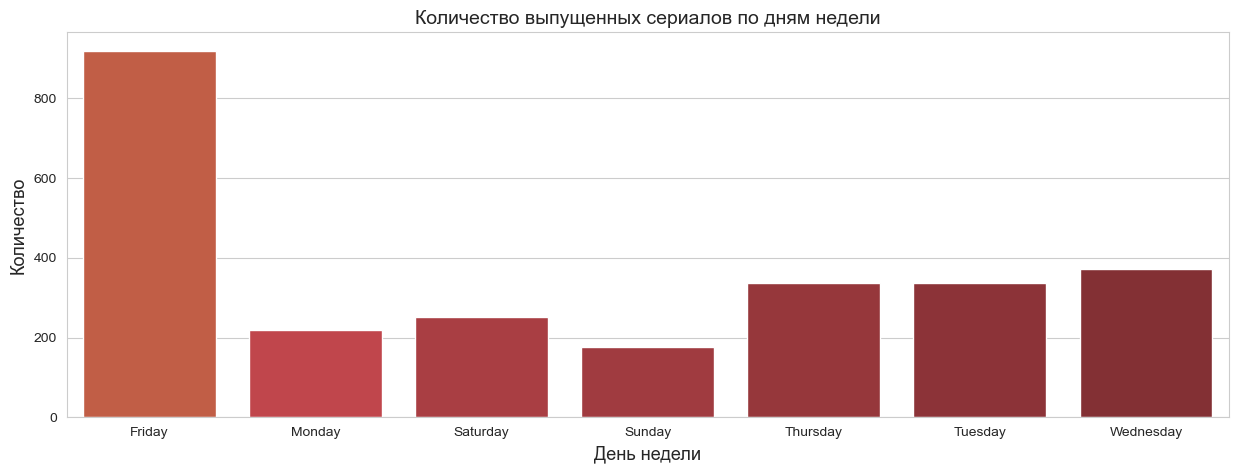

In [469]:
    plt.figure(figsize=(15, 5))
    plt.grid(True)
    sns.barplot(x='weekday', y='show_id', 
                data=show_weekday, 
                palette=palette_sequential, 
                saturation=.5)
    sns.set_style("whitegrid")
    plt.title('Количество выпущенных сериалов по дням недели', size=14)
    plt.xlabel('День недели', size=13)
    plt.ylabel('Количество', size=13)
    plt.show()

In [470]:
# Создаем срез по сериалам
show_month = show.groupby('month_name')['show_id'].count().to_frame().reset_index()

# Доля 
show_month['share'] = (show_month['show_id'] / show_month['show_id'].sum()).round(3) *100
show_month

,month_name,show_id,share
0,April,212,8.1
1,August,236,9.0
2,December,261,10.0
3,February,178,6.8
4,January,181,6.9
5,July,257,9.8
6,June,230,8.8
7,March,210,8.0
8,May,191,7.3
9,November,204,7.8


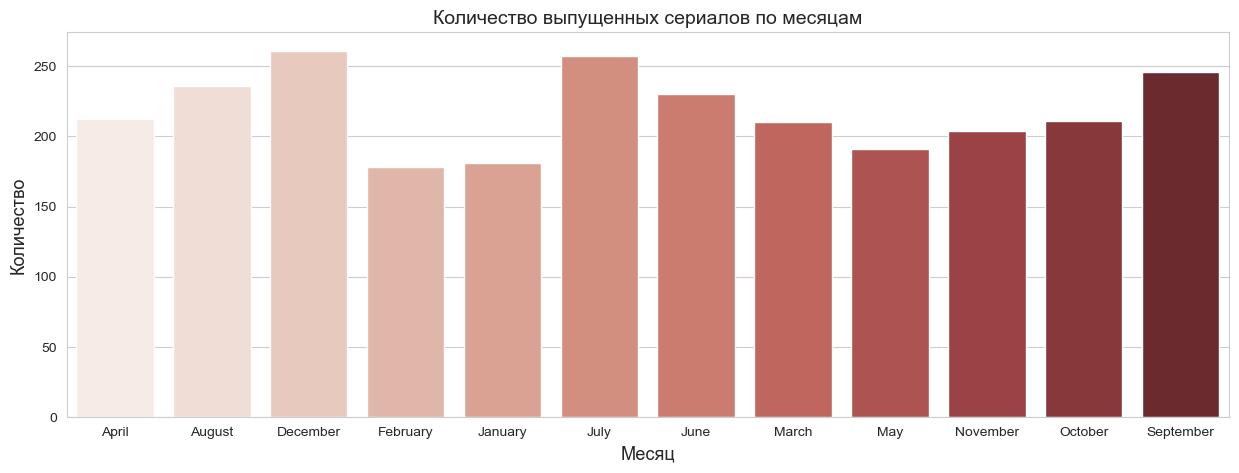

In [471]:
    plt.figure(figsize=(15, 5))
    plt.grid(True)
    sns.barplot(x='month_name', y='show_id', 
                data=show_month, 
                palette="Reds", 
                saturation=.5)
    sns.set_style("whitegrid")
    plt.title('Количество выпущенных сериалов по месяцам', size=14)
    plt.xlabel('Месяц', size=13)
    plt.ylabel('Количество', size=13)
    plt.show()

### Выводы:

- Подавляющее число релизов происходит в пятницу (35.2%). 
- На втором месте (но с большим отрывом) - среда (14.2%);
- Обычно сериалы стартуют в декабре (10%), июле (9.8%) и сентябре (9.4%)

<hr style="border: 2px solid green;" />

###  Анализ продолжительности сериалов (количество сезонов)

In [472]:
show.groupby('duration')['show_id'].count().to_frame().sort_values(by='show_id', ascending=False).reset_index()

# Создаем срез
show_duration = show.groupby('duration')['show_id'].count().to_frame().sort_values(by='show_id', ascending=False).reset_index()

# Доля 
show_duration['share'] = (show_duration['show_id'] / show_duration['show_id'].sum()).round(3) *100
show_duration

,duration,show_id,share
0,1 Season,1765,67.2
1,2 Seasons,421,16.0
2,3 Seasons,198,7.5
3,4 Seasons,92,3.5
4,5 Seasons,62,2.4
5,6 Seasons,31,1.2
6,7 Seasons,20,0.8
7,8 Seasons,16,0.6
8,9 Seasons,8,0.3
9,10 Seasons,5,0.2


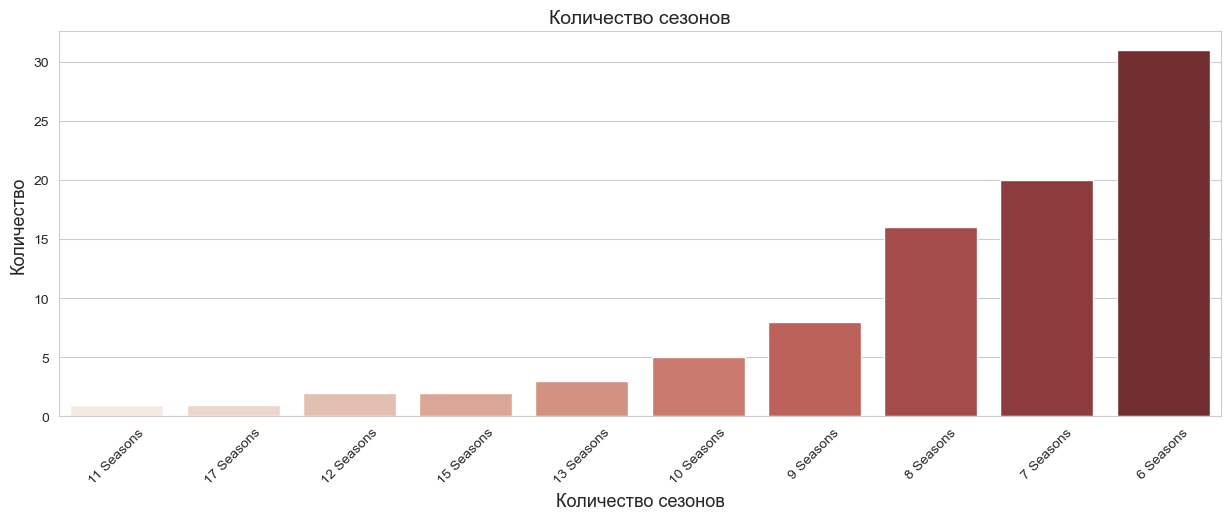

In [473]:
    plt.figure(figsize=(15, 5))
    plt.grid(True)
    sns.barplot(x='duration', y='show_id', 
                data=show.groupby('duration')['show_id'].count().to_frame().reset_index().sort_values(by='show_id').head(10), 
                palette="Reds", 
                saturation=.5)
    sns.set_style("whitegrid")
    plt.title('Количество сезонов', size=14)
    plt.xlabel('Количество сезонов', size=13)
    plt.ylabel('Количество', size=13)
    plt.xticks(rotation=45)
    plt.show()

In [474]:
# Самый продолжительный сериал
show[show['duration'] == '17 Seasons']['title']

548    Grey's Anatomy
Name: title, dtype: object

In [475]:
show[show['duration'] == '15 Seasons']['title']

2423    Supernatural
4798            NCIS
Name: title, dtype: object

In [476]:
show[show['duration'] == '13 Seasons']['title']

1354                 Heartland
4220    COMEDIANS of the world
7847              Red vs. Blue
Name: title, dtype: object

### Выводы:

- Подавляющее большинство сериалов (67.2%) имеют всего один сезон;
- Самое длительное шоу - Grey's Anatomy (Анатомия страсти) - состоит из 17 сезонов.

<hr style="border: 2px solid green;" />

###  Анализ продолжительности фильмов

In [477]:
# Создаем срез по фильмам
movie = df_2[df_2['type'] == 'Movie']
movie = movie.dropna()

In [478]:
# С помощью регулярных выражений уберем 'min' из колонки duration, затем приведем к типу int
def reg_words(row):
    vac_name = row['duration']
    vac_name = re.sub("[^0-9]", " ", vac_name).replace('  ', ' ')
    vac_name = vac_name.replace(' ', '')
    return vac_name

movie['duration'] = movie.apply(reg_words, axis=1)
movie['duration'] = movie['duration'].astype('int')
movie.describe()

,release_year,duration
count,5652.000000,5652.000000
mean,2015.415605,98.280609
std,4.532717,27.219228
min,2000.000000,3.000000
25%,2014.000000,86.000000
50%,2017.000000,98.000000
75%,2019.000000,113.000000
max,2021.000000,312.000000


In [479]:
movie_duration = movie.groupby('duration')['show_id'].count().to_frame().reset_index().sort_values(by='show_id')

print(np.percentile(movie_duration['duration'], [5, 95]))

[ 15.5 202. ]


In [480]:
movie_duration = movie_duration.query('duration >= 15 and duration <= 202')

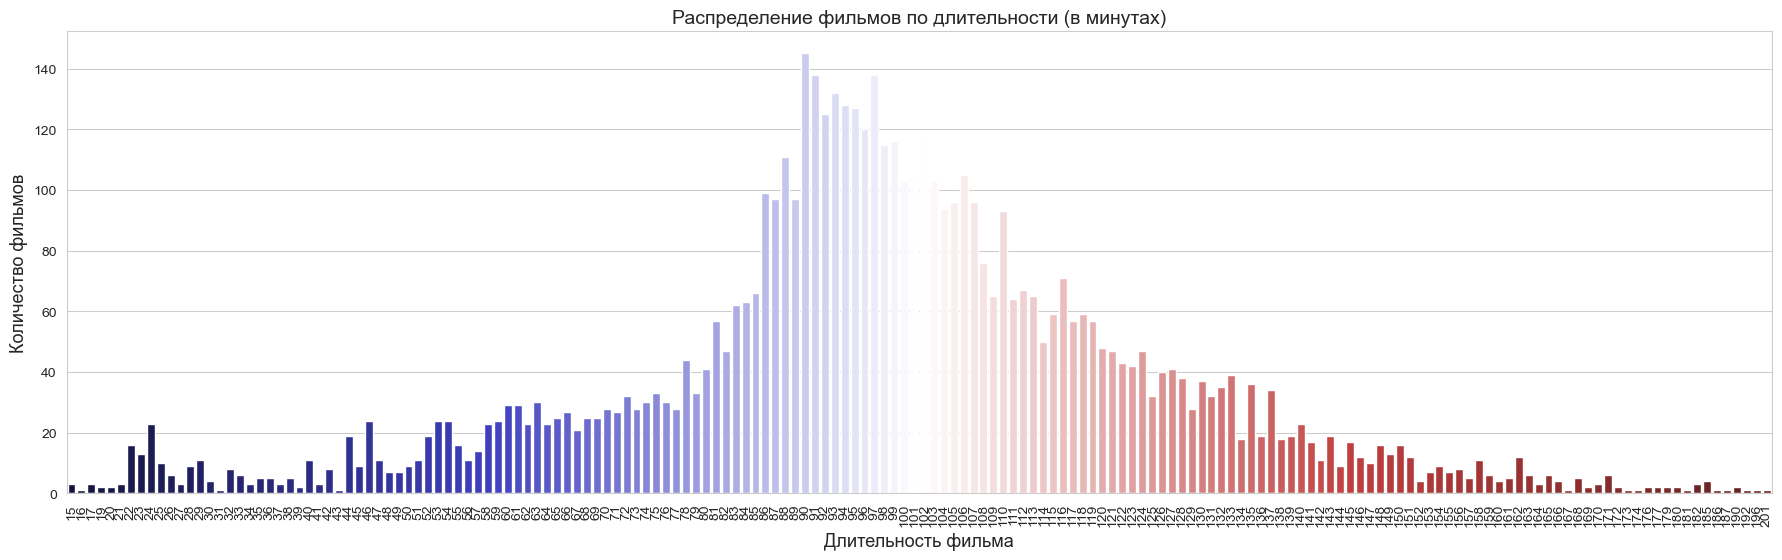

In [481]:
    plt.figure(figsize=(22, 6))
    plt.grid(True)
    sns.barplot(x='duration', y='show_id', 
                data=movie_duration, 
                palette="seismic", 
                saturation=.5)
    sns.set_style("whitegrid")
    plt.title('Распределение фильмов по длительности (в минутах)', size=14)
    plt.xlabel('Длительность фильма', size=13)
    plt.ylabel('Количество фильмов', size=13)
    plt.xticks(rotation=90)
    plt.show()

In [482]:
# Самый продолжительный фильм
movie[movie['duration'] == 312]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,year_month,weekday,month_name
4253,s4254,Movie,Black Mirror: Bandersnatch,No Data,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",2018-12-28,2018-12,Friday,December


In [483]:
# Самый короткий фильм (мультик)
movie[movie['duration'] == 3]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,year_month,weekday,month_name
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",No Data,United States,"June 4, 2019",2014,TV-Y,3,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...",2019-06-04,2019-06,Tuesday,June


### Выводы:

- Средняя продолжительность фильма - 98 минут
- Самое продолжительный фильм - Black Mirror: Bandersnatch - длится 312 минуты


<hr style="border: 2px solid green;" />

### Анализ стран-производителей фильмов\сериалов, представленных на Netflix

In [484]:
# Добавление колонку с ведущей страной-создателем фильма или сериала
df_2 = df_2.assign(leading_country = lambda x: x['country'].apply(lambda x: x.split(sep=',')[0]))

In [485]:
leading_country = (
    df_2.groupby('leading_country')['show_id']
    .count()
    .to_frame()
    .reset_index()
    .sort_values(by='show_id', ascending=False)
)
leading_country = leading_country[leading_country['leading_country'] != 'No Data']

In [486]:
# Доля фильмов\сериалов каждой страны на Netflix
leading_country['share'] = (leading_country['show_id'] / leading_country['show_id'].sum()).round(3) *100
leading_country.head(15)

,leading_country,show_id,share
80,United States,2936,39.3
30,India,924,12.4
79,United Kingdom,595,8.0
11,Canada,266,3.6
37,Japan,251,3.4
69,South Korea,211,2.8
21,France,203,2.7
70,Spain,181,2.4
45,Mexico,130,1.7
76,Turkey,110,1.5


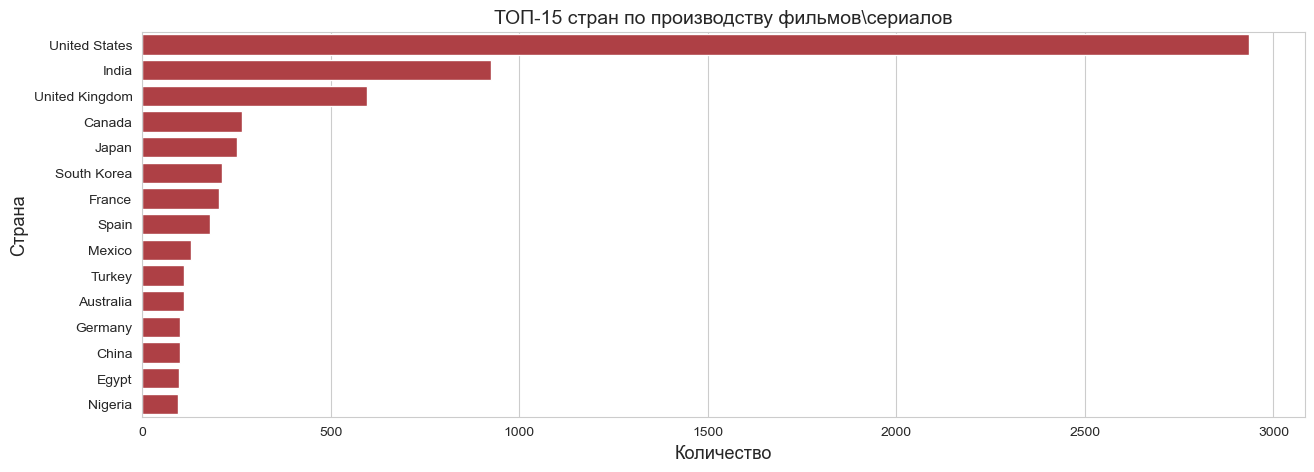

In [487]:
    plt.figure(figsize=(15, 5))
    plt.grid(True)
    sns.barplot(y='leading_country', x='show_id', 
                data=leading_country.head(15), 
                color ='#e50914', 
                #palette=palette, 
                saturation=.5)
    sns.set_style("whitegrid")
    plt.title('ТОП-15 стран по производству фильмов\сериалов', size=14)
    plt.xlabel('Количество', size=13)
    plt.ylabel('Страна', size=13)
    #plt.xticks(rotation=90)
    plt.show()

### Выводы:

- Большая часть фильмов и сериалов на Netflix производства США - 39% 
- Далее следуют: Индия(12%), Великобритания(8%), Канада(3.6%), Япония(3.4%)


<hr style="border: 2px solid green;" />

### Анализ возрастного рейтинга фильмов и сериалов

### Рейтинг фильмов

`Рейтинговая система MPAA (Американская Киноассоциация, Motion Picture Association of America)`

**Рейтинг G — General audiences**

Фильм демонстрируется без ограничений. 

**Рейтинг PG**

Детям рекомендуется смотреть фильм с родителями. Некоторые материалы могут не подходить для детей.

**Рейтинг PG-13**

Просмотр не желателен детям до 13 лет. 

**Рейтинг R**

Лица, не достигшие 17-летнего возраста, допускаются на фильм только в сопровождении одного из родителей. Некоторый материал фильма предназначается только для взрослых. 

**Рейтинг NC-17**

Лица 17-летнего возраста и младше на фильм не допускаются. Фильм может содержать сексуальные сцены, непристойную лексику, сцены  насилия. 

**NR (Not Rated)**

Для фильмов, не получивших рейтинг Американской ассоциации, обычно используется обозначение NR (Not Rated), а для картин, вышедших в прокат до введения системы рейтингов (до 1 ноября 1968 года) — обозначение U (Unrated).

***

### Рейтинг сериалов

**TV-Y**

Подходит для очень юной аудитории, включая детей в возрасте от 2 до 6 лет.


**TV-Y7**

Подходит для детей от 7 лет и старше.

**TV-G**

Подходит для всех возрастов. Хотя не обязательно могут содержать контент, представляющий интерес для детей. 

**TV-PG**

Сериалы с таким рейтингом могут включать ненормативную лексику и / или умеренное насилие.

**TV-14**

Подходит для детей младше 14 лет. Содержат грубый юмор, употребление наркотиков / алкоголя, ненормативную лексику, иногда насилие.

**TV-MA**

Контент для зрелой аудитории. Такие фильмы могут содержать грубую лексику, откровенный контент, наготу или насилие. Такие рейтинги редко встречаются на бесплатном эфирном телевидении. 


In [488]:
rating = df_2.groupby('rating')['show_id'].count().to_frame().reset_index().sort_values(by='show_id', ascending=False)

# Доля каждого рейтинга
rating['share'] = (rating['show_id'] / rating['show_id'].sum()).round(3) *100
rating

,rating,show_id,share
9,TV-MA,3143,37.9
7,TV-14,2027,24.5
10,TV-PG,809,9.8
6,R,688,8.3
5,PG-13,421,5.1
12,TV-Y7,325,3.9
11,TV-Y,305,3.7
4,PG,240,2.9
8,TV-G,208,2.5
2,NR,73,0.9


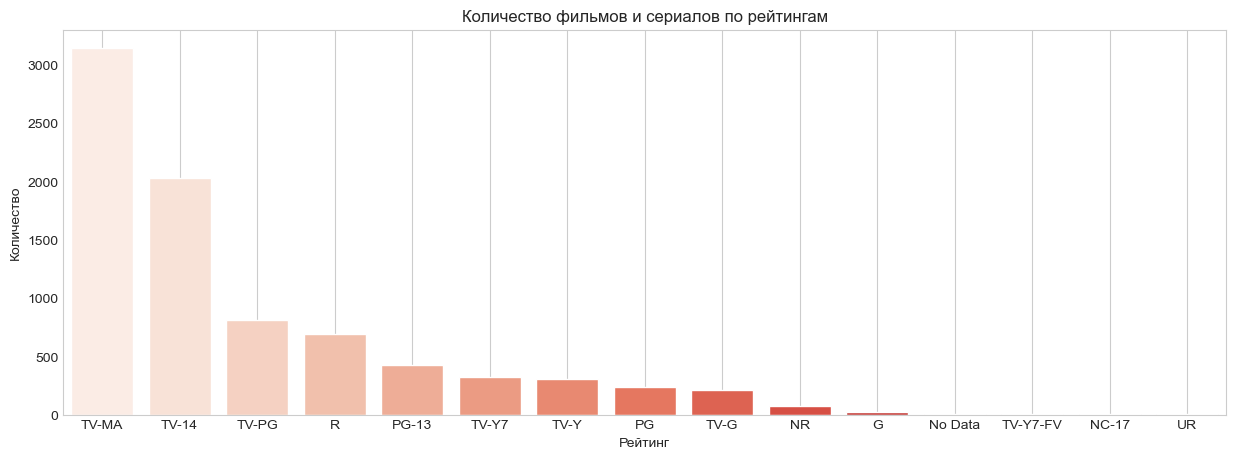

In [489]:
plt.figure(figsize = (15,5))

ax = sns.barplot(y='show_id', x= 'rating', 
                 data=df_2.groupby('rating')['show_id'].count().to_frame().reset_index().sort_values(by='show_id', ascending=False), 
                 palette="Reds")
plt.title('Количество фильмов и сериалов по рейтингам')
plt.xlabel('Рейтинг')
plt.ylabel('Количество')
plt.grid()
ax.tick_params(direction="in", length=10)
ax.set_axisbelow(True);

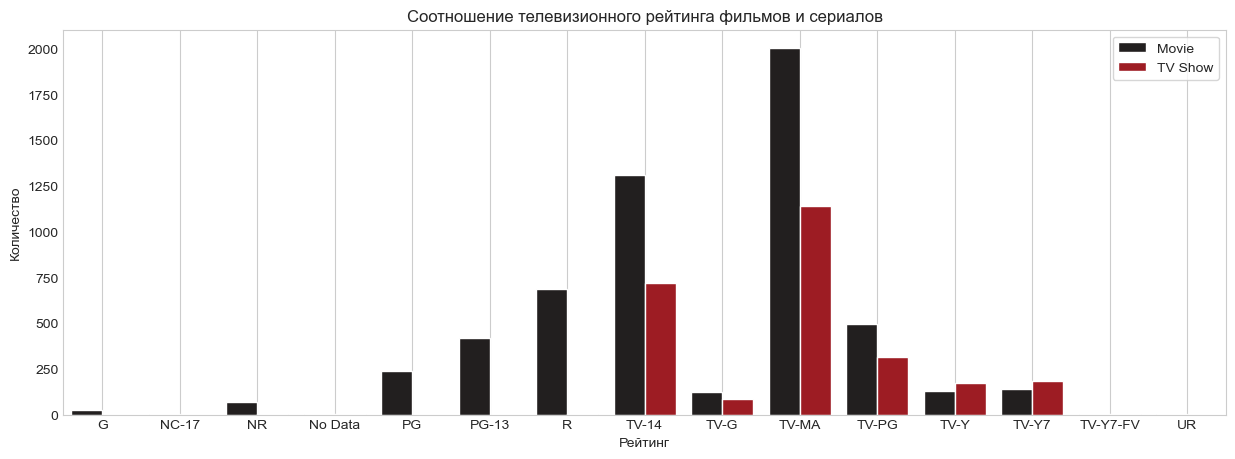

In [490]:
plt.figure(figsize = (15,5))

ax = sns.barplot(y='show_id', x= 'rating', 
                 data=df_2.groupby([ 'type', 'rating'])['show_id'].count().to_frame().reset_index(), 
                 hue = 'type', 
                 palette=palette)
plt.title('Соотношение телевизионного рейтинга фильмов и сериалов')
plt.xlabel('Рейтинг')
plt.ylabel('Количество')
plt.legend(loc='upper right')
plt.grid()
ax.tick_params(direction="in", length=10)
ax.set_axisbelow(True);

### Выводы:

- Большая часть фильмов и сериалов на Netflix имеют рейтинг TV-MA (контент для зрелой аудитории) - 37.9%
- Далее следует TV-14 (24.5%), т.е. подходит для детей младше 14 лет.
- Интересно, что доля сериалов в рейтингах TV-Y и TV-Y7 превышает долю фильмов.

<hr style="border: 2px solid green;" />

## Итоговый вывод по проекту:

В датасете срез фильмов и сериалов с 1925 по 2021 год.

**Общее:**

- Начиная с 1925 года количество релизов постепенно возрастало и достигло пика в 2018 году. Затем начался небольшой спад;
- Значительное увеличение релизов фильмов и сериалов начинается с 2015 года. В 2021 наметился спад, вероятно, по причине пандемии в 2020.
- Большая часть фильмов и сериалов на Netflix производства США - 39%. Далее следуют: Индия(12%), Великобритания(8%), Канада(3.6%), Япония(3.4%);
- Большая часть фильмов и сериалов на Netflix имеют рейтинг TV-MA (контент для зрелой аудитории) 37.9%. Далее следует TV-14 (24.5%), т.е. подходит для детей младше 14 лет;
- Интересно, что доля сериалов в рейтингах TV-Y и TV-Y7 превышает долю фильмов.

**Сериалы:**

- Доля выпущенных сериалов с 2000 года - 32%;
- Подавляющее число релизов происходит **в пятницу (35.2%)**. На втором месте (но с большим отрывом) - **среда (14.2%)**;
- Обычно **сериалы стартуют в декабре (10%)**, июле (9.8%) и сентябре (9.4%);
- Подавляющее большинство сериалов (67.2%) имеют **всего один сезон**;
- Самый длительное сериал - Grey's Anatomy (Анатомия страсти) - состоит из 17 сезонов.
- В 2021 количество релизов сериалов превысило количество фильмов. Свою роль сыграла пандемия, кинотеатры закрыты, сильно возрос интерес к стриминговым сервисам по подписке такой тренд сохраняется и сейчас;

**Фильмы:**

- Доля выпущенных фильмов с 2000 года - 68%;
- Средняя продолжительность фильма - **98 минут**;
- Самое продолжительный фильм - Black Mirror: Bandersnatch - длится 312 минуты
- Пик релизов фильмов приходится на 2017-2018 года. Начиная с 2019 количество выпущенных фильмов начало сокращаться (в т.ч. по причине пандемии);


***